In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [46]:
cma = pd.read_csv("cma.csv")
dataset = pd.read_csv("sales+monthly.csv")
# Parse string to datetime type
dataset['datum'] = pd.to_datetime(dataset['datum'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['datum'])
cma['datum'] = pd.to_datetime(cma['datum'], infer_datetime_format=True)
indexedcma= cma.set_index(['datum'])


In [39]:
from datetime import datetime
train_data, test_data = train_test_split(indexedDataset, test_size=0.2, shuffle=False)
indexedDataset.head(5)



,sales
datum,
2014-01-31,152.100
2014-02-28,177.000
2014-03-31,147.655
2014-04-30,130.900
2014-05-31,132.100


In [42]:
import pandas as pd
from IPython.display import HTML



# save DataFrame to CSV file
indexedDataset.to_csv('sample.csv', index=False)

# create download link for the CSV file
display(HTML(f'<a href="./sample.csv" download>Download CSV</a>'))



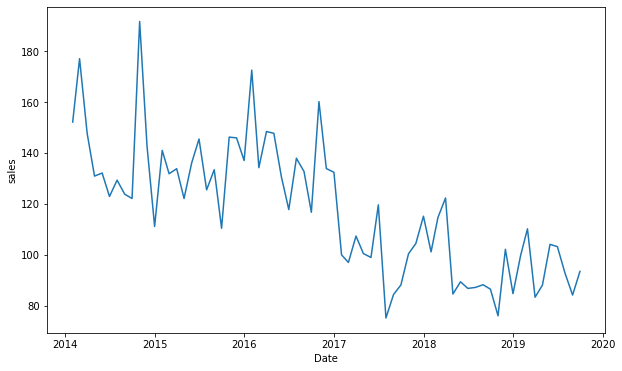

In [10]:
plt.xlabel("Date")
plt.ylabel("sales")
indexedDataset = indexedDataset.drop(indexedDataset.index[-1])
plt.plot(indexedDataset)

In [11]:
#Determing rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()

rolstd = indexedDataset.rolling(window=12).std()

print(rolmean,rolstd)

                sales
datum                
2014-01-31        NaN
2014-02-28        NaN
2014-03-31        NaN
2014-04-30        NaN
2014-05-31        NaN
...               ...
2019-05-31  91.429167
2019-06-30  92.795833
2019-07-31  93.262500
2019-08-31  92.925000
2019-09-30  93.508333

[69 rows x 1 columns]                 sales
datum                
2014-01-31        NaN
2014-02-28        NaN
2014-03-31        NaN
2014-04-30        NaN
2014-05-31        NaN
...               ...
2019-05-31  10.123969
2019-06-30  10.540624
2019-07-31  10.393292
2019-08-31  10.633833
2019-09-30  10.439563

[69 rows x 1 columns]


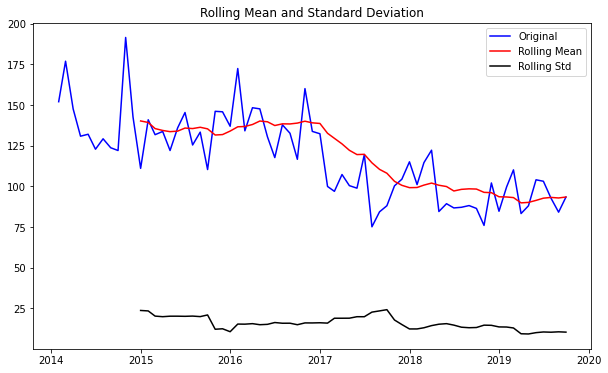

In [12]:
#rolling mean method for determine stationarity

orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label="Rolling Mean")
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [13]:
#Dickey-fuller test
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test: ')
dftest = adfuller(indexedDataset['sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    

print(dfoutput)

Results of Dickey-Fuller Test: 
Test Statistics                -1.960302
p-value                         0.304246
#Lags Used                      2.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64


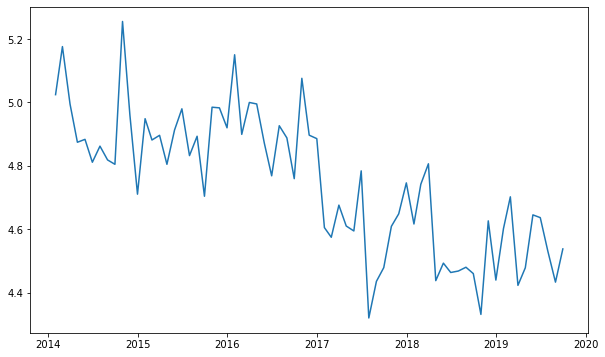

In [14]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

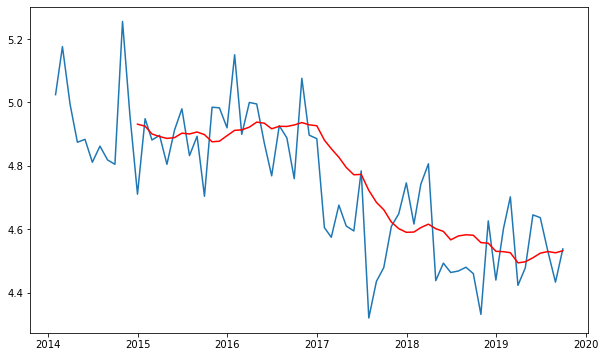

In [15]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [16]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,sales
datum,
2014-12-31,-0.220801
2015-01-31,0.023627
2015-02-28,-0.019067
2015-03-31,0.003977
2015-04-30,-0.081729
2015-05-31,0.023930
2015-06-30,0.076838
2015-07-31,-0.068271
2015-08-31,-0.013449


In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label ='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    plt.show(block=False)
    
    #perform dickey-fuller test:
    
    dftest = adfuller(timeseries['sales'], autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    

    print(dfoutput)
    
    

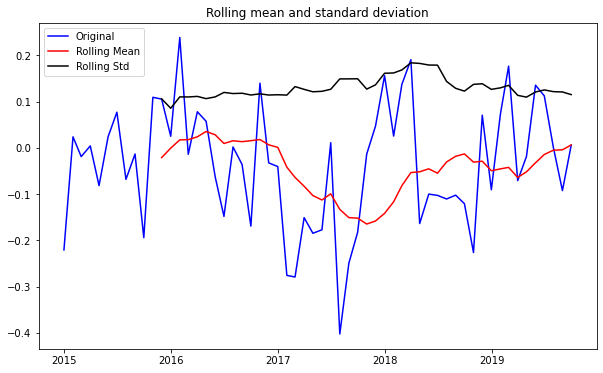

Test Statistics                -5.451869
p-value                         0.000003
#Lags Used                      0.000000
Number of Observations Used    57.000000
Critical Value (1%)            -3.550670
Critical Value (5%)            -2.913766
Critical Value (10%)           -2.594624
dtype: float64


In [18]:
test_stationarity(datasetLogScaleMinusMovingAverage)

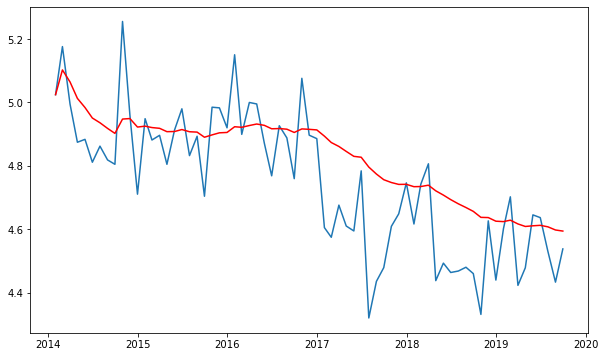

In [19]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

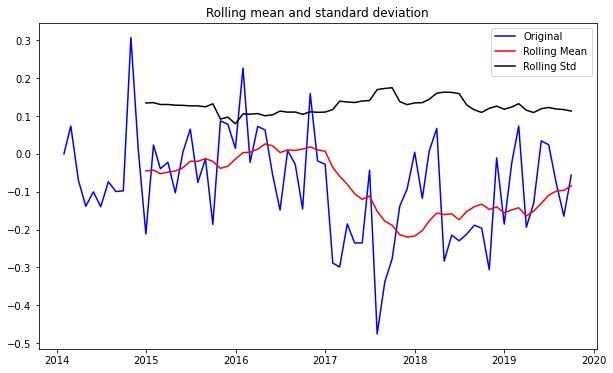

Test Statistics                -2.924851
p-value                         0.042534
#Lags Used                      2.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64


In [20]:
datasetLogScaleMinusMovingExponenttialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponenttialDecayAverage)

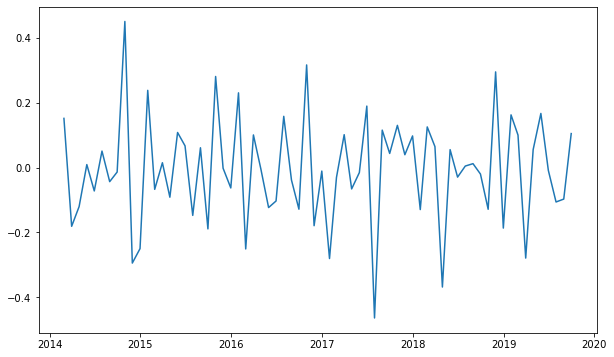

In [21]:
datasetLogdiffshifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogdiffshifting)

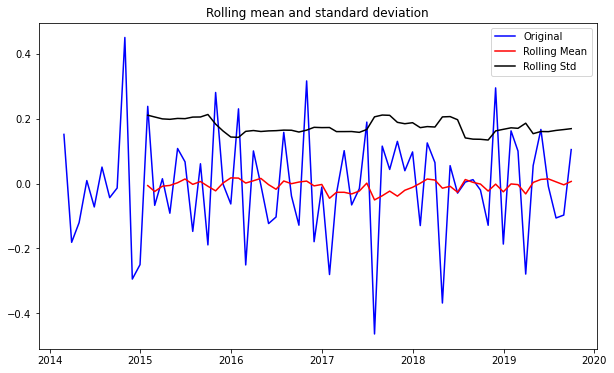

Test Statistics               -9.656458e+00
p-value                        1.389951e-16
#Lags Used                     1.000000e+00
Number of Observations Used    6.600000e+01
Critical Value (1%)           -3.533560e+00
Critical Value (5%)           -2.906444e+00
Critical Value (10%)          -2.590724e+00
dtype: float64


In [22]:
datasetLogdiffshifting.dropna(inplace=True)
test_stationarity(datasetLogdiffshifting)

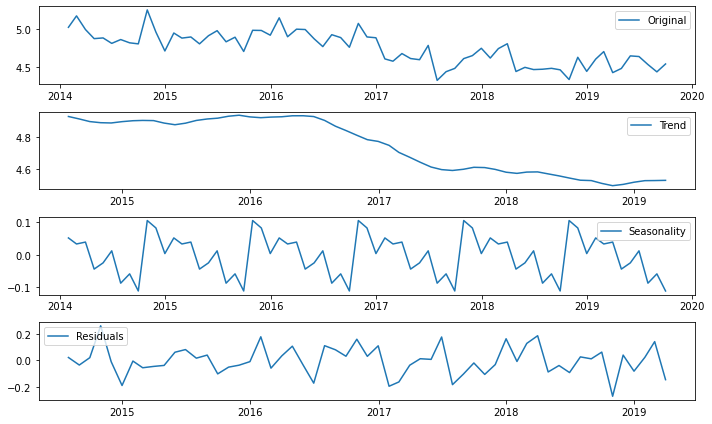

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


# decomposedLogData = residual
# decomposedLogData.dropna(inplace=True)
# df = decomposedLogData.to_frame()
# df = df.rename(columns={'resid': 'sales'})
# test_stationarity(df)

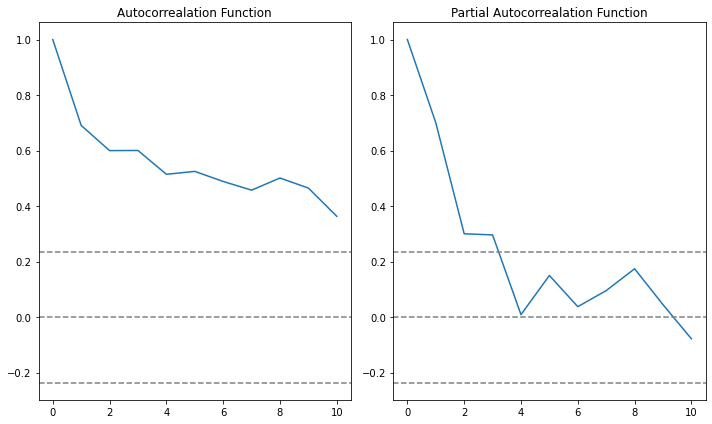

In [24]:
#ACF and PACF Plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(indexedDataset_logScale, nlags=10)
lag_pacf = pacf(indexedDataset_logScale, nlags=10, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset_logScale)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset_logScale)),linestyle='--',color='gray')
plt.title('Autocorrealation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(indexedDataset_logScale)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(indexedDataset_logScale)),linestyle='--',color='gray')
plt.title('Partial Autocorrealation Function')
plt.tight_layout()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Shift the index of datasetLogdiffshifting["sales"]
# indexedDataset_logScale_shifted = indexedDataset_logScale.shift()

# AR Model
model = ARIMA(indexedDataset_logScale, order=(1,1,4))
results_ARIMA = model.fit()
# predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
# predictions_ARIMA_diff
fitted_values = results_ARIMA.fittedvalues.values

# Remove first two values from fitted results
# fitted_values = fitted_values[2:]
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff = predictions_ARIMA_diff[1:]
predictions_ARIMA_diff

C:\Users\paliw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\paliw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\paliw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


datum
2014-02-28    5.024538
2014-03-31    5.114566
2014-04-30    5.041377
2014-05-31    5.002952
2014-06-30    4.931522
                ...   
2019-05-31    4.517352
2019-06-30    4.540209
2019-07-31    4.582071
2019-08-31    4.574473
2019-09-30    4.514981
Length: 68, dtype: float64

C:\Users\paliw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\paliw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\paliw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


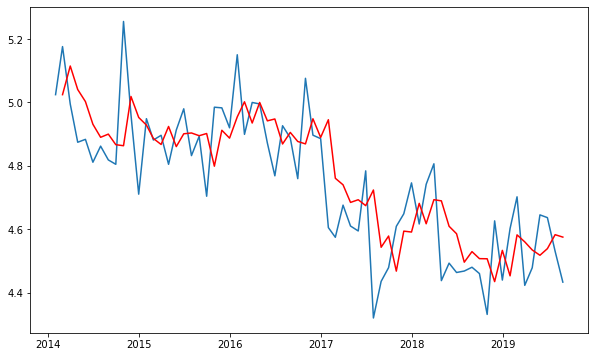

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Shift the index of datasetLogdiffshifting["sales"]
# indexedDataset_logScale_shifted = indexedDataset_logScale.shift()
indexedDataset_logScale = indexedDataset_logScale.drop(indexedDataset_logScale.index[-1])
# AR Model
model = ARIMA(indexedDataset_logScale, order=(0,1,6))
results_AR = model.fit()

# Get fitted values and calculate RSS
fitted_values = results_AR.fittedvalues.dropna()
results_AR.fittedvalues = results_AR.fittedvalues[1:]
diff = fitted_values - indexedDataset_logScale["sales"].loc[fitted_values.index]
RSS = (diff ** 2).sum()

# Plot the results
plt.plot(indexedDataset_logScale["sales"])
plt.plot(results_AR.fittedvalues, color='red')
# plt.title('RSS: %.4f' % RSS)
# print('Plotting AR model')



In [50]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff = predictions_ARIMA_diff[2:]
print(predictions_ARIMA_diff)

datum
2014-03-31    5.114566
2014-04-30    5.041377
2014-05-31    5.002952
2014-06-30    4.931522
2014-07-31    4.890341
                ...   
2019-05-31    4.517352
2019-06-30    4.540209
2019-07-31    4.582071
2019-08-31    4.574473
2019-09-30    4.514981
Length: 67, dtype: float64


In [51]:
predictions_ARIMA = pd.Series(indexedDataset_logScale['sales'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff,fill_value=0)
predictions_ARIMA

datum
2014-01-31     5.024538
2014-02-28     5.024538
2014-03-31    10.139104
2014-04-30    10.065915
2014-05-31    10.027490
                ...    
2019-05-31     9.541890
2019-06-30     9.564747
2019-07-31     9.606609
2019-08-31     9.599012
2019-09-30     4.514981
Length: 69, dtype: float64

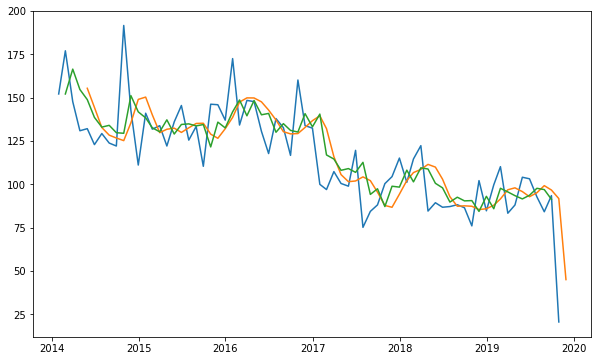

In [47]:
predictions_ARIMA=np.exp(predictions_ARIMA_diff)
plt.plot(indexedDataset)
plt.plot(indexedcma)
plt.plot(predictions_ARIMA)
from flask import Flask, send_file

app = Flask(__name__)

@app.route('/download_predictions')
def download_predictions():
    return send_file('predictions.csv', as_attachment=True, attachment_filename='predictions.csv')


In [53]:
print(results_ARIMA.forecast(steps=2))

2019-10-31    4.520581
2019-11-30    4.507950
Freq: M, Name: predicted_mean, dtype: float64


In [54]:
results = results_ARIMA.forecast(steps=2)
finalres = np.exp(results)
my_df = finalres.to_frame()
my_df

,predicted_mean
2019-10-31,91.888999
2019-11-30,90.735610


In [55]:
my_df_1 = predictions_ARIMA.to_frame(name='predicted_mean')
my_df_1

,predicted_mean
datum,
2014-03-31,166.428535
2014-04-30,154.682828
2014-05-31,148.851897
2014-06-30,138.590341
2014-07-31,132.998905
...,...
2019-05-31,91.592738
2019-06-30,93.710398
2019-07-31,97.716519


In [56]:
concatenated_df = pd.concat([my_df_1, my_df])
concatenated_df

,predicted_mean
2014-03-31,166.428535
2014-04-30,154.682828
2014-05-31,148.851897
2014-06-30,138.590341
2014-07-31,132.998905
...,...
2019-07-31,97.716519
2019-08-31,96.976951
2019-09-30,91.375842
2019-10-31,91.888999


In [57]:
concatenated_df.to_csv('predictions.csv', index=True)

In [58]:
df = pd.read_csv("predictions.csv")
lst = df.values.tolist()
pred = pd.DataFrame(lst)
pred.columns = ['Year','Sales']
pred

,Year,Sales
0,2014-03-31,166.428535
1,2014-04-30,154.682828
2,2014-05-31,148.851897
3,2014-06-30,138.590341
4,2014-07-31,132.998905
...,...,...
64,2019-07-31,97.716519
65,2019-08-31,96.976951
66,2019-09-30,91.375842
67,2019-10-31,91.888999


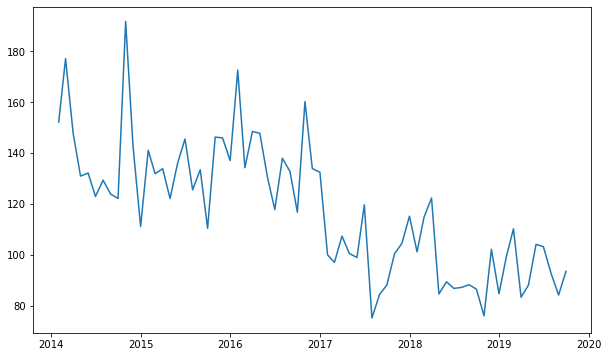

In [60]:
plt.plot(indexedDataset)

In [6]:
import altair as alt
import datapane as dp
import pandas as pd
fig = (
    alt.Chart(pred)
    .mark_point()
    .encode(x=alt.X("Year", scale=alt.Scale(zero=False)), 
            y=alt.X("Sales", scale=alt.Scale(zero=False)))
)
view = dp.Select(dp.Plot(fig, label="Plot"), dp.DataTable(pred, label="Data"))
view
# dp.upload_report(view, name="My Report",open=True)